In [2]:
# pip install -q optax dm-haiku

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import optax
import haiku as hk
import pandas as pd

Due Date: November 6th
# Part 1 (80 %)

The code below is similar to the Cake Eating problem code we implemented in class. The difference is that the consumption policy function is written as a simple sigle-layer neural network, with tanh activation.

We will interpret the size of the cake as being total wealth, and cake consumption as general consumption. The fraction of wealth not consumed today are the *savings* (line 51). The dynamics of wealth are described by line 54. That line is equivalent to assuming that your savings are invested in a risk-free savings account that pays 0 interest, and therefore has a gross return of 1, denoted by *R* (line 53).


In [8]:
jnp.array([1., 1.])

Array([1., 1.], dtype=float32)

In [13]:
γ = 2.
β = 0.95


def U(c):
    return c**(1 - γ) / (1 - γ)


optimizer = optax.adam
lr = 1e-3
T = 50


def nnet(x):
    X = jnp.column_stack([x])
    X = hk.Linear(32)(X)
    X = jnp.tanh(X)
    X = hk.Linear(1)(X)
    X = jnp.squeeze(X)
    return X

# def nnet(x, t):
#     X = jnp.column_stack([x, t])
#     X = hk.Linear(32)(X)
#     X = jnp.tanh(X)
#     X = hk.Linear(1)(X)
#     X = jnp.squeeze(X)
#     return X


init, nnet = hk.without_apply_rng(hk.transform(nnet))
rng = jax.random.PRNGKey(0)
# Θ = init(rng, jnp.array(1.), jnp.array(1.))
Θ = init(rng, jnp.array(1.))


opt_state = optimizer(lr).init(Θ)


def L(Θ):

    x = 1.
    G = 0.

    state = x
    inputs = jnp.arange(T)

    def core(state, inputs):
        t = inputs
        xt = state

#         ct = jax.nn.sigmoid(nnet(Θ, xt, t/T) - 4.) * xt
        ct = jax.nn.sigmoid(nnet(Θ, xt) - 4.) * xt
        ut = U(ct)
        savings = xt - ct

        R = 1.00
        x_tp1 = R * savings

        discounted_utility = β**t * ut
        return x_tp1, discounted_utility

    x, discounted_utility = jax.lax.scan(core, state, inputs)
    G = discounted_utility.sum()
    return -G


@jax.jit
def evaluation(Θ):
    return -L(Θ)


@jax.jit
def update_gradient_descent(Θ, opt_state):
    grad = jax.grad(L)(Θ)
    updates, opt_state = optimizer(lr).update(grad, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ, opt_state


for iteration in range(1000000):
    Θ, opt_state = update_gradient_descent(Θ, opt_state)

    if iteration % 1000 == 0:
        print(evaluation(Θ))

-1301.506
-869.2983
-846.7147
-839.0067
-833.3895
-830.02356
-828.23004
-826.9353
-825.75574
-824.7249
-823.7855
-822.9817
-822.2771
-821.69434
-821.21606
-820.81537
-820.4752
-820.1895
-819.97266
-819.688
-819.4782
-819.28235
-819.10175
-818.94244
-818.7757
-818.62213
-818.46533
-818.33215
-818.23584
-818.0699
-817.95233
-817.8442
-817.7517
-817.6627
-817.54816
-817.4692
-817.42596
-817.3053
-817.2387
-817.19415
-817.1492
-817.1023
-816.98584
-816.92773
-817.0358
-816.8701
-816.7832
-816.8662
-816.6918
-816.64905
-816.60535
-816.5681
-816.53235
-816.49817
-816.4707
-816.4336
-816.42224
-816.428
-816.3635
-816.3916
-816.33905
-816.322
-816.2711
-816.26056
-816.19836
-816.1793
-816.1512
-816.1286
-816.1106
-816.147
-816.1642
-816.06683
-816.02966
-816.012
-816.0072
-816.00525
-815.97943
-815.9399
-815.93274
-816.01917
-815.9034
-815.878
-815.97375
-815.88776
-815.8865
-815.8187
-815.8008
-815.8059
-815.8336
-815.77734
-815.7451
-815.75854
-815.7241
-815.7071
-815.7368
-815.6801
-815.668

-814.5051
-814.5055
-814.50574
-814.5045
-814.50415
-814.50525
-814.50415
-814.50446
-814.5044
-814.504
-814.5039
-814.50323
-814.50366
-814.5029
-814.5035
-814.5041
-814.50336
-814.5034
-814.5034
-814.5043
-814.5034
-814.5036
-814.5027
-814.50305
-814.503
-814.50244
-814.50287
-814.5023
-814.5032
-814.5024
-814.5023
-814.50226
-814.5029
-814.5024
-814.50214
-814.502
-814.5019
-814.5014
-814.50165
-814.50183
-814.50226
-814.5015
-814.5014
-814.501
-814.5011
-814.50134
-814.50183
-814.501
-814.50146
-814.50116
-814.50085
-814.50073
-814.5009
-814.5007
-814.5009
-814.50073
-814.5002
-814.501
-814.5005
-814.50104
-814.50073
-814.501
-814.50085
-814.5
-814.5003
-814.5003
-814.4994
-814.4996
-814.5002
-814.5001
-814.4999
-814.49976
-814.4999
-814.49896
-814.49927
-814.4994
-814.4999
-814.499
-814.49927
-814.4994
-814.49896
-814.4996
-814.4993
-814.4995
-814.49854
-814.49963
-814.4987
-814.49835
-814.49884
-814.4986
-814.49866
-814.4996
-814.49805
-814.49866
-814.4984
-814.4987
-814.4987
-81

Suppose now that your savings are fully invested in the stock market, so the evolution of wealth is now stochastic. The stock market gross return is modeled by the function below:

In [33]:
γ = 2.
β = 0.95


def U(c):
    return c**(1 - γ) / (1 - γ)


optimizer = optax.adam
lr = 1e-3
T = 50


# def nnet(x):
#     X = jnp.column_stack([x])
#     X = hk.Linear(32)(X)
#     X = jnp.tanh(X)
#     X = hk.Linear(1)(X)
#     X = jnp.squeeze(X)
#     return X

def nnet(x, t):
    X = jnp.column_stack([x, t])
    X = hk.Linear(32)(X)
    X = jnp.tanh(X)
    X = hk.Linear(1)(X)
    X = jnp.squeeze(X)
    return X

def stock_return(rng):
    μs = 0.06
    σs = 0.2
    ε = jax.random.normal(rng, ())
    log_return = μs + σs * ε
    return jnp.exp(log_return)

init, nnet = hk.without_apply_rng(hk.transform(nnet))
rng = jax.random.PRNGKey(1)
# Θ = init(rng, jnp.array(1.))
Θ = init(rng, jnp.array(1.), jnp.array(1.))
opt_state = optimizer(lr).init(Θ)

def L(Θ, rng):

    x = 1.
    G = 0.

    state = x
    inputs = jnp.arange(T)
    tmp_rng = rng
    def core(state, inputs):
        t = inputs
        xt, tmp_rng = state
#         ct = jax.nn.sigmoid(nnet(Θ, xt) - 4.) * xt
        ct = jax.nn.sigmoid(nnet(Θ, xt, t/T) - 4.) * xt
        ut = U(ct)
        savings = xt - ct
        
        tmp_rng, sub_rng = jax.random.split(tmp_rng)
        R = stock_return(sub_rng)
        x_tp1 = R * savings

        discounted_utility = β**t * ut
        return (x_tp1, tmp_rng), discounted_utility
    x, discounted_utility = jax.lax.scan(core, (state, tmp_rng), inputs)
    G = discounted_utility.sum()
    return -G

# def L2(Θ, rng):

#     x = 1.
#     G = 0.

#     state = x
#     inputs = jnp.arange(T)
#     tmp_rng = rng
#     def core(state, inputs):
#         t = inputs
#         xt, tmp_rng = state
# #         ct = jax.nn.sigmoid(nnet(Θ, xt) - 4.) * xt
#         ct = jax.nn.sigmoid(nnet(Θ, xt, t/T) - 4.) * xt
#         ut = U(ct)
#         savings = xt - ct
        
#         tmp_rng, sub_rng = jax.random.split(tmp_rng)
#         R = stock_return(sub_rng)
#         x_tp1 = R * savings

#         discounted_utility = β**t * ut
#         return (x_tp1, tmp_rng), discounted_utility
#     x, discounted_utility = jax.lax.scan(core, (state, tmp_rng), inputs)
#     G = discounted_utility.sum()
#     return rng, -G

# @jax.jit
# def evaluation(Θ, rng):
#     tmp_rng, sub_rng = jax.random.split(rng)
#     inputs = jnp.arange(10000)
#     tmp_rng, Gs = jax.lax.scan(L2, tmp_rng, inputs)
#     return Gs

@jax.jit
def evaluation(Θ, rng):
    return -L(Θ, rng)


@jax.jit
def update_gradient_descent(Θ, opt_state, rng):
    grad = jax.grad(L)(Θ, rng)
    updates, opt_state = optimizer(lr).update(grad, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ, opt_state
tmp_log = []
for iteration in range(1000000):
    rng, sub_rng = jax.random.split(rng)
    Θ, opt_state = update_gradient_descent(Θ, opt_state, sub_rng)

    if iteration % 1000 == 0:
        tmp_out = evaluation(Θ, sub_rng)
        print(tmp_out)
        tmp_log.append(tmp_out)

-701.1816
-472.72284
-265.16162
-335.2259
-316.25638
-189.42189
-536.9957
-393.54102
-335.56845
-236.26045
-204.92253
-179.731
-438.855
-312.96338
-297.89886
-282.8452
-515.3196
-214.54214
-275.91986
-408.90146
-458.876
-154.55008
-530.0419
-190.70271
-294.61237
-202.83868
-784.6343
-408.7181
-532.39154
-540.92975
-258.12216
-287.9449
-156.09789
-173.4943
-409.26596
-856.3964
-676.2897
-216.28445
-202.71979
-313.7844
-378.29956
-488.7144
-385.7427
-427.94104
-307.8115
-1402.2651
-353.0485
-471.99866
-150.83365
-582.01904
-818.41595
-761.2523
-250.96735
-388.6298
-247.48587
-354.84683
-206.0953
-302.11118
-213.28105
-306.37204
-280.87244
-624.57434
-281.4637
-210.69025
-571.3374
-334.90613
-339.58942
-335.1446
-460.4763
-365.59338
-450.0542
-417.55997
-381.89362
-395.4424
-476.6102
-255.36958
-510.59732
-140.33861
-217.75888
-257.82153
-914.3458
-230.51918
-176.32257
-2669.7175
-460.97247
-387.8704
-718.77185
-341.3521
-377.60294
-278.05444
-306.02948
-290.81348
-565.8659
-673.49084
-23

KeyboardInterrupt: 

# Part 2 (20 %)
Suppose that instead of investing the wealth entirely in the stock market, you have the option to assign a fraction $\alpha$ of your wealth in the stock market, and the remaining is invested in a risk-free savings account that pays a 1.04 % gross return. Notice that $\alpha$ is bounded below by 0, and bounded above by 1.

Solve for the optimal consumption ($c$) and asset allocation ($\alpha$).

- Print the average sum of discounted rewards (utilities) using 1 million simulations.

 - Plot the average consumption-wealth ratio ($c / x)$ for each time period $t=0, 1, ..., 49$

 - Plot the average asset allocation in the risky asset($\alpha)$ for each time period $t=0, 1, ..., 49$

Hint: Starting from the code of the previous assignment, the modifications you have to implement are minimal. Namely:

- The output of the neural network now should be a 2d vector, corresponding to the consumption-wealth ratio (c / x) and $\alpha$, respectively

In [38]:
γ = 2.0
β = 0.95
rf_return = 1.0104# Risk-free return (1.04% gross return)
def U(c):
    return c**(1 - γ) / (1 - γ)

optimizer = optax.adam
lr = 1e-3
T = 50
num_simulations = 10000000 # Number of simulations

# Define the neural network to output both consumption-wealth ratio (c / x) and alpha (α)
def stock_return(rng):
    μs = 0.06
    σs = 0.2
    rng, key = jax.random.split(rng)  # Split the RNG key to create a new one for each call
    ε = jax.random.normal(key, ())
    log_return = μs + σs * ε
    return jnp.exp(log_return), rng  # Return the updated rng key as well

# def nnet(x):
#     X = jnp.column_stack([x])
#     X = hk.Linear(32)(X)
#     X = jnp.tanh(X)
#     X = hk.Linear(2)(X)
#     X = jnp.squeeze(X)
#     return X

def nnet(x, t):
    X = jnp.column_stack([x, t])
    X = hk.Linear(32)(X)
    X = jnp.tanh(X)
    X = hk.Linear(2)(X)
    X = jnp.squeeze(X)
    return X

init, nnet = hk.without_apply_rng(hk.transform(nnet))
rng = jax.random.PRNGKey(0)
# Θ = init(rng, jnp.array(1.))
Θ = init(rng, jnp.array(1.), jnp.array(1.))


opt_state = optimizer(learning_rate=lr).init(Θ)

def L(Θ, rng):
    x = 1.0
    G = 0
    state = x
    inputs = jnp.arange(T)

    def core(carry, inputs):
        rng, xt = carry  # Include rng in the carry
        t = inputs

#         c_x, alpha = nnet(Θ, xt) - 4
        c_x, alpha = nnet(Θ, xt, t/T) - 4
        c_x, alpha = jax.nn.sigmoid(c_x), jax.nn.sigmoid(alpha)  # Ensure outputs are between 0 and 1
        ct = c_x * xt
        
        ut = U(ct)
        savings = xt - ct
        
        # Update dynamics of wealth with asset allocation
        R, rng = stock_return(rng)
        R = alpha * R + (1 - alpha) * rf_return
        x_tp1 = R * savings
        discounted_utility = β**t * ut

        return (rng, x_tp1), (discounted_utility, c_x, x_tp1, jnp.squeeze(alpha))

    (_, x), (discounted_utility, c_xs, x_tp1, alphas) = jax.lax.scan(core, (rng, state), inputs)
    G = discounted_utility.sum()
    return -G, (c_xs, x_tp1, alphas)

@jax.jit
def evaluation(Θ, rng):
    eval_value, (c_xs, x_tp1, alphas) = L(Θ, rng)
    return -eval_value, (c_xs, x_tp1, alphas)

@jax.jit
def update_gradient_descent(Θ, opt_state, rng):
    (neg_G, (c_xs, x_tp1, alphas)), grad = jax.value_and_grad(L, 0, has_aux=True)(Θ, rng)
    updates, opt_state = optimizer(learning_rate=lr).update(grad, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ, neg_G, opt_state, c_xs, x_tp1, alphas

# Collect data for plotting
# avg_rewards = []

average_sum_of_discounted_rewards = []
avg_consumption_wealth_ratio = []
avg_asset_allocation = []
avg_wealth = []
for iteration in range(num_simulations):
    rng, iter_key = jax.random.split(rng)  # Split rng for each iteration
    Θ, neg_G, opt_state, c_xs, x_tp1s, alphas = update_gradient_descent(Θ, opt_state, iter_key)
    if iteration % 1000 == 0:
        print(evaluation(Θ, iter_key)[0])
    average_sum_of_discounted_rewards.append(neg_G.item())
    avg_consumption_wealth_ratio.append(c_xs)
    avg_asset_allocation.append(alphas)
    avg_wealth.append(x_tp1s)
avg_c_xs = sum(avg_consumption_wealth_ratio)/num_simulations
avg_alphas = sum(avg_asset_allocation)/num_simulations
avg_wealth = sum(avg_wealth)/num_simulations
print("Average sum of discounted rewards (utilities) using 1 million simulations:", jnp.array(average_sum_of_discounted_rewards).mean().item())

-879.70264
-398.9876
-522.07074
-171.30818
-339.9699
-406.2735
-234.53491
-177.3047
-286.20645
-188.49661
-172.04095
-278.98688
-617.39856
-193.1542
-275.1706
-401.06946
-232.46397
-309.12988
-387.47787
-1089.2095
-362.42822
-2232.3936
-325.39667
-466.2895
-205.96172
-363.12314
-333.11093
-804.14636
-624.83093
-328.15576
-495.7439
-218.55167
-431.90863
-264.12457
-308.22375
-532.63666
-300.0979
-425.04688
-1206.2957
-251.81598
-385.21915
-881.08704
-177.92203
-304.02512
-570.68445
-431.52527
-385.1643
-1370.49
-236.5662
-254.28802
-324.82513
-486.73764
-202.73134
-548.8235
-196.3143
-427.15128
-222.91946
-394.14136
-462.7272
-658.6763
-276.40775
-274.05405
-722.58276
-197.59683
-231.97961
-422.13315
-361.34387
-651.9285
-270.771
-547.0842
-401.78253
-453.9284
-382.81998
-1326.1743
-500.34213
-541.13495
-190.8072
-429.51
-352.28207
-334.752
-261.15634
-1057.7146
-358.81412
-1068.2356
-127.031136
-341.53793
-315.2535
-543.7743
-311.04196
-301.68268
-212.56464
-439.16336
-905.9676
-495.38

-352.51108
-361.98105
-929.2721
-523.40186
-467.20044
-141.73616
-365.02338
-178.36319
-288.78467
-706.66986
-722.42145
-175.51262
-546.453
-195.83856
-565.5265
-120.841835
-616.6388
-238.09534
-327.59964
-314.34805
-363.61725
-508.48053
-172.19638
-615.6222
-311.85168
-562.885
-575.84344
-527.0229
-438.27615
-555.6207
-584.75195
-357.6632
-491.76538
-445.39117
-221.72197
-246.86745
-270.31818
-524.58844
-271.38257
-170.33585
-322.95703
-277.35605
-389.23355
-362.50546
-715.27216
-250.6933
-508.57837
-272.86145
-368.3674
-331.58252
-697.3271
-490.2831
-452.35806
-215.89218
-169.16907
-291.4129
-328.21228
-198.86105
-306.38162
-315.84106
-476.01727
-191.0361
-605.2607
-264.7686
-532.2504
-441.9184
-418.86993
-332.78583
-408.04184
-376.43878
-373.16315
-512.7024
-356.57507
-353.46152
-740.87415
-429.0466
-313.2764
-508.1226
-867.40955
-467.92932
-221.48412
-172.69077
-359.6847
-362.21283
-440.86157
-552.7234
-473.7152
-1562.9801
-353.73273
-257.54013
-486.61282
-570.35144
-399.86792
-678

-342.3198
-653.2603
-318.15668
-429.05597
-624.4603
-268.58514
-225.27821
-496.06366
-236.473
-204.72627
-558.6725
-366.40417
-448.1878
-550.7689
-452.88983
-331.74493
-700.6032
-429.1952
-549.2788
-475.0673
-254.42429
-312.6697
-461.93338
-269.05374
-222.43881
-438.2922
-282.34015
-413.4533
-804.3559
-259.8035
-419.91522
-285.6237
-438.69736
-450.0029
-221.88635
-355.1876
-211.11142
-263.35382
-425.86954
-400.90637
-291.27136
-315.97397
-482.22696
-229.74644
-176.62509
-251.32188
-936.0307
-707.78375
-298.13663
-176.25601
-243.77303
-442.33493
-852.92456
-679.1754
-497.23962
-233.9751
-645.027
-341.4533
-371.0548
-648.8721
-438.61166
-258.87122
-193.8122
-975.5314
-345.69077
-460.76456
-571.64825
-241.04204
-290.54437
-321.60516
-238.2937
-1067.7407
-488.2073
-193.8058
-218.66905
-236.28464
-179.08073
-232.32834
-422.91382
-358.54694
-186.86288
-526.148
-334.61172
-465.73932
-276.85233
-950.5592
-384.19485
-162.4035
-617.9774
-147.7603
-1505.3749
-323.7973
-190.37811
-373.42438
-357.0

-284.92752
-747.6984
-369.20294
-353.6565
-350.6328
-200.66248
-305.25497
-606.2736
-442.39127
-450.15808
-177.2497
-295.18845
-262.04288
-358.09875
-293.75314
-401.79156
-294.32883
-181.70999
-185.82637
-296.88205
-608.69275
-239.77014
-422.43817
-413.87387
-362.76447
-496.7122
-570.5466
-284.95273
-453.16263
-260.77417
-279.63992
-290.22583
-327.14825
-422.46106
-609.4524
-452.728
-193.94931
-781.1122
-358.32947
-699.84326
-221.7248
-316.61115
-387.85297
-631.0331
-212.81853
-424.8644
-502.25723
-519.5669
-268.06815
-310.0939
-347.69305
-566.1575
-487.5821
-182.6576
-295.56085
-156.96298
-602.48303
-607.4092
-205.80118
-345.16757
-788.3545
-203.16238
-570.1677
-255.81436
-356.16882
-289.35446
-308.1207
-279.17368
-213.68488
-336.30457
-350.49564
-277.00848
-328.23825
-678.2398
-192.00964
-585.80286
-255.31529
-273.6064
-151.64758
-699.14575
-181.98416
-329.638
-274.53705
-168.57368
-424.7052
-472.08636
-382.85315
-322.38126
-298.657
-378.15555
-151.71915
-324.44833
-762.77136
-363.03

-406.64697
-199.9755
-674.06946
-294.67438
-569.3103
-767.82434
-249.38757
-161.41722
-429.69986
-246.27773
-491.66177
-472.69412
-285.7325
-209.05382
-655.3949
-371.98328
-214.77548
-604.0062
-183.11964
-411.91418
-518.96545
-353.08762
-222.90115
-280.02362
-248.83936
-365.34372
-787.70996
-567.6959
-315.1483
-197.40929
-243.27101
-194.65134
-213.23596
-337.93036
-276.33337
-369.86676
-173.0895
-264.89734
-281.80313
-762.35657
-330.0818
-782.43787
-262.77472
-215.8692
-219.32948
-260.83768
-392.6513
-617.4547
-338.18353
-285.0427
-620.4021
-243.6475
-367.40787
-284.46072
-311.35764
-354.20047
-553.29816
-439.14874
-453.32993
-263.56708
-384.93222
-349.63013
-296.61417
-314.7752
-650.419
-213.4302
-289.3106
-367.35114
-122.358894
-349.63843
-236.37393
-453.98242
-204.07768
-279.04694
-302.26538
-271.03436
-221.71303
-392.53427
-290.7577
-165.20872
-285.17987
-433.9663
-409.21506
-294.32803
-220.62878
-154.27098
-510.09012
-489.10413
-282.8949
-616.3805
-281.89728
-484.0282
-500.19086
-

-300.10428
-280.09595
-223.5363
-318.5418
-264.29333
-231.65677
-258.72635
-985.81335
-681.48773
-267.8181
-727.50256
-340.34213
-283.45273
-161.86507
-438.02576
-256.76062
-398.04977
-349.82434
-419.52185
-712.1299
-275.51242
-252.06085
-478.10516
-212.80075
-294.70764
-372.3739
-826.14734
-370.86966
-363.86676
-355.25864
-280.04303
-605.4649
-644.68506
-557.29956
-396.94788
-439.91104
-356.8883
-292.79092
-337.1579
-336.0764
-382.27853
-730.7363
-623.45374
-427.24457
-331.09814
-273.26968
-349.2798
-316.2931
-316.35706
-351.69763
-694.57983
-648.8003
-606.55457
-530.51697
-521.00146
-524.7639
-307.90195
-547.3812
-186.03441
-307.7253
-549.688
-154.70961
-260.91586
-404.65125
-266.8679
-649.3166
-339.79694
-467.18597
-444.4759
-287.1814
-127.21719
-442.24988
-289.6262
-275.79352
-358.5572
-513.2421
-243.44724
-242.80295
-438.69983
-465.2401
-538.692
-508.73828
-239.68124
-216.40482
-226.46884
-477.11472
-370.58234
-504.989
-422.7063
-418.86508
-564.62646
-285.79605
-484.75513
-674.604

-317.74725
-218.9555
-454.32224
-315.12225
-120.13845
-609.62714
-713.9256
-1479.5217
-475.88367
-213.62582
-329.1878
-352.57043
-206.3939
-677.31
-194.36967
-673.5682
-216.66335
-302.96487
-791.5864
-640.67114
-802.2882
-611.3541
-445.91217
-287.95587
-426.24445
-272.38663
-327.26
-129.81862
-96.953804
-301.51495
-357.82288
-175.99718
-207.8986
-226.18022
-1659.408
-268.42096
-368.92844
-440.13586
-421.93494
-332.11337
-577.72015
-432.04984
-343.30402
-559.02637
-437.4402
-333.4096
-406.65662
-297.96347
-620.84656
-405.47723
-319.60468
-305.90247
-419.24887
-349.40543
-339.3543
-181.05475
-206.93668
-492.5639
-350.68756
-319.5472
-212.88255
-277.77646
-204.11382
-249.44965
-310.38684
-907.78827
-286.83527
-543.3075
-407.03488
-638.4013
-343.89606
-385.9182
-195.4224
-303.52808
-219.20131
-190.96419
-200.69025
-169.72513
-185.5152
-229.41725
-402.85208
-277.44937
-176.23433
-220.19667
-181.50601
-126.082436
-160.56842
-211.77097
-303.0924
-566.54944
-244.53047
-277.84265
-323.06125
-28

-438.1924
-455.7852
-714.7581
-195.3888
-571.15533
-275.76703
-826.9408
-179.72835
-485.25793
-228.39987
-268.78888
-217.93848
-198.21486
-119.00798
-425.87802
-453.69788
-207.92302
-559.06824
-272.8129
-814.9341
-1292.0353
-438.73654
-420.0996
-645.426
-462.7387
-615.4754
-204.4586
-205.25555
-181.56148
-337.0523
-371.65198
-489.6175
-359.86395
-748.7283
-205.06372
-376.92853
-661.4782
-512.10724
-816.1132
-627.88586
-211.20207
-287.99945
-289.84982
-791.19495
-758.8865
-203.47871
-509.2168
-190.428
-244.10136
-299.92758
-466.02115
-368.38303
-167.31323
-259.7643
-162.7742
-361.4465
-329.58566
-288.88153
-333.3879
-329.18176
-171.21252
-553.83417
-307.0341
-205.95628
-376.16833
-334.08905
-513.76764
-292.54022
-292.09863
-531.78595
-206.03664
-550.8266
-1499.3523
-477.27576
-317.46613
-284.7632
-337.20367
-214.9187
-1012.9954
-292.80997
-198.88165
-753.3602
-481.47824
-715.1312
-317.56793
-364.79297
-207.5964
-528.5403
-380.17596
-1279.7249
-280.80994
-681.0199
-136.33224
-1094.1128
-

-221.85512
-342.81714
-403.7522
-519.1057
-367.55084
-754.2594
-352.7916
-164.5667
-557.8235
-454.88715
-607.0563
-209.75667
-162.2857
-439.23315
-153.47815
-474.81534
-149.91794
-190.00922
-177.82555
-943.6079
-284.46292
-235.52234
-308.55954
-338.891
-508.45465
-606.45276
-232.5105
-589.5826
-183.53323
-318.73676
-371.93906
-395.38287
-659.0651
-198.6129
-303.4675
-777.1072
-552.5128
-636.76746
-174.3014
-371.22906
-219.73007
-382.61102
-514.7908
-456.87662
-291.89438
-274.5674
-413.7452
-167.62047
-294.75714
-397.9867
-415.25998
-281.9857
-423.68976
-420.3669
-485.30063
-215.24284
-440.1366
-343.94614
-679.5804
-212.74117
-1001.0504
-811.09863
-435.99115
-182.50908
-732.688
-348.92828
-404.74408
-269.74966
-481.3612
-248.01599
-808.526
-413.15063
-212.13138
-351.1357
-548.4368
-212.76355
-351.23956
-217.76186
-413.28708
-728.815
-200.55904
-298.74524
-174.33833
-730.34033
-382.7767
-242.34769
-247.12454
-567.99316
-1124.9407
-768.8613
-409.29938
-178.78232
-279.50568
-376.20993
-801

-174.94188
-345.30267
-368.44037
-233.91122
-2068.227
-400.48682
-389.68744
-343.50104
-431.10272
-341.2282
-418.211
-170.89804
-215.81885
-258.72522
-274.45013
-696.13306
-248.43195
-153.23029
-453.41388
-345.06088
-411.1371
-439.1846
-204.99384
-1188.583
-404.56006
-349.05487
-634.2925
-357.7846
-575.897
-505.87216
-340.61386
-664.8248
-268.6502
-406.75592
-389.4995
-199.8475
-508.64215
-153.96494
-227.97998
-183.03255
-265.88663
-225.68805
-260.37097
-383.575
-693.1377
-1012.31726
-511.0999
-277.1879
-332.0613
-646.77496
-565.3884
-562.29694
-263.97528
-292.63824
-639.43774
-264.07147
-306.36908
-147.99661
-523.11957
-306.0047
-225.81068
-402.86227
-311.36713
-409.72556
-371.1043
-423.92825
-398.3403
-278.30902
-196.48305
-527.3328
-314.88797
-560.687
-234.93427
-729.5759
-125.79862
-435.6392
-1575.5947
-492.0105
-217.46207
-250.10623
-300.97543
-623.67957
-373.59357
-470.61926
-212.37796
-393.66827
-294.60065
-257.49838
-559.20917
-160.71556
-766.34753
-208.77586
-604.6584
-189.572

-224.35919
-411.503
-257.0051
-301.29944
-309.333
-329.50113
-174.68192
-189.24574
-280.4667
-408.47754
-391.06116
-398.7672
-278.66016
-370.63135
-488.87067
-306.12802
-219.29224
-240.97054
-533.42004
-304.0927
-825.00433
-424.72137
-443.59836
-280.30307
-498.38376
-433.81265
-283.6599
-293.813
-485.31284
-449.35336
-673.0446
-380.33072
-415.39658
-278.10626
-598.20605
-334.72815
-193.53767
-158.26213
-158.39423
-476.74902
-761.0522
-588.1023
-273.67902
-232.39093
-297.9088
-310.12717
-270.87018
-431.79944
-235.19504
-261.88293
-181.79701
-501.37848
-502.47867
-1327.8043
-225.80827
-178.16663
-137.8414
-219.36989
-504.17093
-258.88184
-227.78342
-310.19684
-290.67953
-214.5184
-293.1253
-264.9944
-252.14012
-255.41806
-281.2551
-284.58405
-152.72176
-446.31613
-178.77798
-278.3424
-157.14127
-214.74632
-693.1346
-458.0878
-419.3448
-891.051
-364.05753
-242.0625
-430.57104
-354.92548
-339.18936
-373.7111
-288.9182
-335.1005
-378.8192
-208.72147
-606.1357
-533.63745
-403.26
-463.48245
-

-413.9615
-354.44708
-419.68115
-217.12712
-281.75098
-427.21603
-208.29054
-484.4492
-315.80493
-333.55585
-154.96796
-258.35474
-281.32227
-421.64148
-440.52197
-415.94128
-270.80566
-535.662
-442.0205
-387.56885
-749.1852
-388.64685
-294.57495
-269.30573
-151.60738
-535.485
-225.845
-288.43225
-351.8006
-232.7555
-403.0541
-418.27057
-667.4094
-306.12054
-251.82579
-459.8108
-268.1624
-195.94662
-439.29163
-318.94363
-261.35083
-643.59814
-811.7733
-196.17374
-356.6947
-257.1053
-434.44318
-179.34653
-288.76245
-286.53833
-330.15164
-315.38123
-152.84949
-213.67079
-422.31226
-419.94565
-210.92323
-219.85321
-453.36664
-614.95447
-321.71817
-1930.0383
-210.18208
-256.25677
-396.6859
-146.14694
-1206.8838
-861.8551
-322.79224
-214.40196
-353.09366
-237.61026
-540.1742
-667.8623
-115.14615
-320.58185
-817.7964
-251.9251
-545.50854
-380.312
-152.64986
-576.9524
-267.53024
-614.4269
-543.0439
-413.25467
-204.06087
-565.16925
-332.0423
-204.52151
-479.79846
-208.68991
-356.58856
-598.735

-593.41455
-472.68503
-760.4225
-291.71362
-634.76404
-298.02386
-391.23798
-333.04062
-282.24875
-220.11433
-223.32593
-314.34296
-644.1991
-337.2825
-346.8432
-389.07706
-680.516
-407.63644
-250.23978
-549.5088
-189.91331
-503.6489
-778.1701
-211.29137
-202.67151
-416.12988
-296.85602
-340.13293
-492.97073
-315.53888
-467.5398
-228.33554
-769.1444
-228.30573
-270.11322
-201.43788
-202.4682
-228.05136
-318.13068
-278.40442
-305.34955
-243.93423
-504.46967
-603.4253
-982.43097
-381.4426
-265.39624
-387.03293
-328.11014
-204.21982
-306.18365
-631.36597
-410.46875
-426.64798
-283.06155
-408.62323
-252.58601
-423.0776
-479.12466
-478.6499
-472.53058
-504.56622
-533.73047
-994.65393
-161.68596
-333.47134
-453.10898
-174.9201
-320.62485
-491.53033
-221.1891
-334.58905
-470.22687
-359.20798
-294.41245
-316.16382
-292.9864
-133.03046
-194.48442
-363.3337
-257.0159
-382.8397
-190.21347
-433.62216
-327.9364
-346.7448
-305.82272
-211.47116
-171.4594
-319.61566
-174.22769
-277.9535
-492.52573
-43

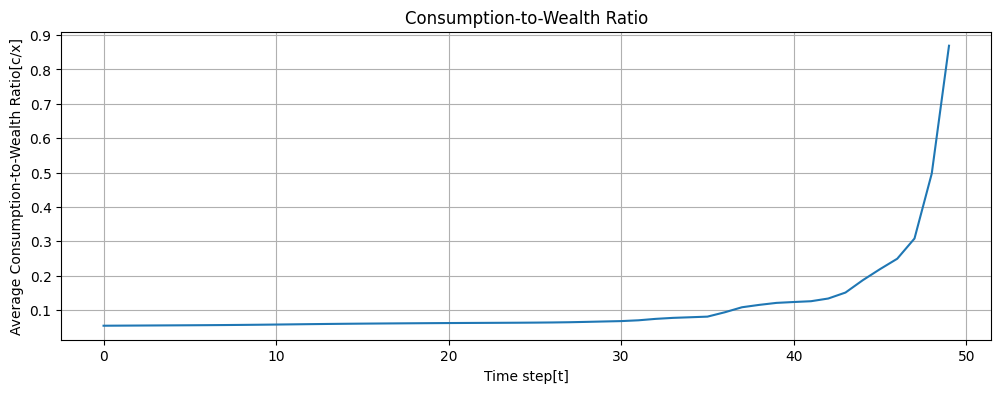

In [39]:
plt.figure(figsize=(12,4))
plt.plot(avg_c_xs)
plt.title('Consumption-to-Wealth Ratio')
plt.xlabel('Time step[t]')
plt.ylabel('Average Consumption-to-Wealth Ratio[c/x]')
plt.grid()
plt.show()

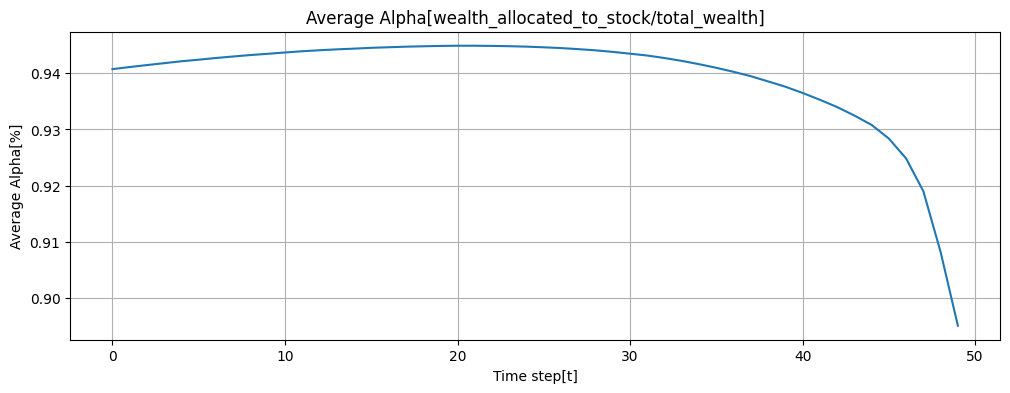

In [40]:
plt.figure(figsize=(12,4))
plt.plot(avg_alphas)
plt.title('Average Alpha[wealth_allocated_to_stock/total_wealth]')
plt.xlabel('Time step[t]')
plt.ylabel('Average Alpha[%]')
plt.grid()
plt.show()

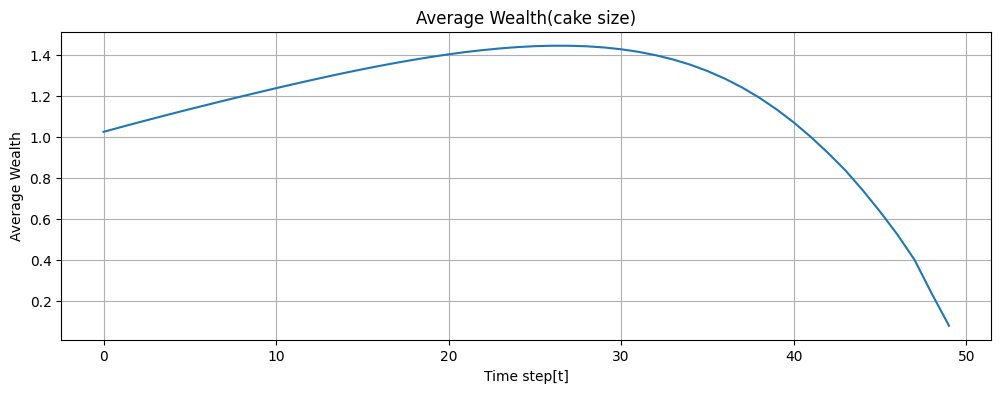

In [41]:
plt.figure(figsize=(12,4))
plt.plot(avg_wealth)
plt.title('Average Wealth(cake size)')
plt.xlabel('Time step[t]')
plt.ylabel('Average Wealth')
plt.grid()
plt.show()